<a href="https://colab.research.google.com/github/FredMiraglia/projeto_analise_dados/blob/main/Projeto_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
tipo = pd.DataFrame(iris['target'], columns=['iris'])
tipo


,iris
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df_completo = pd.concat([df, tipo], axis=1)

In [8]:
df_completo

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


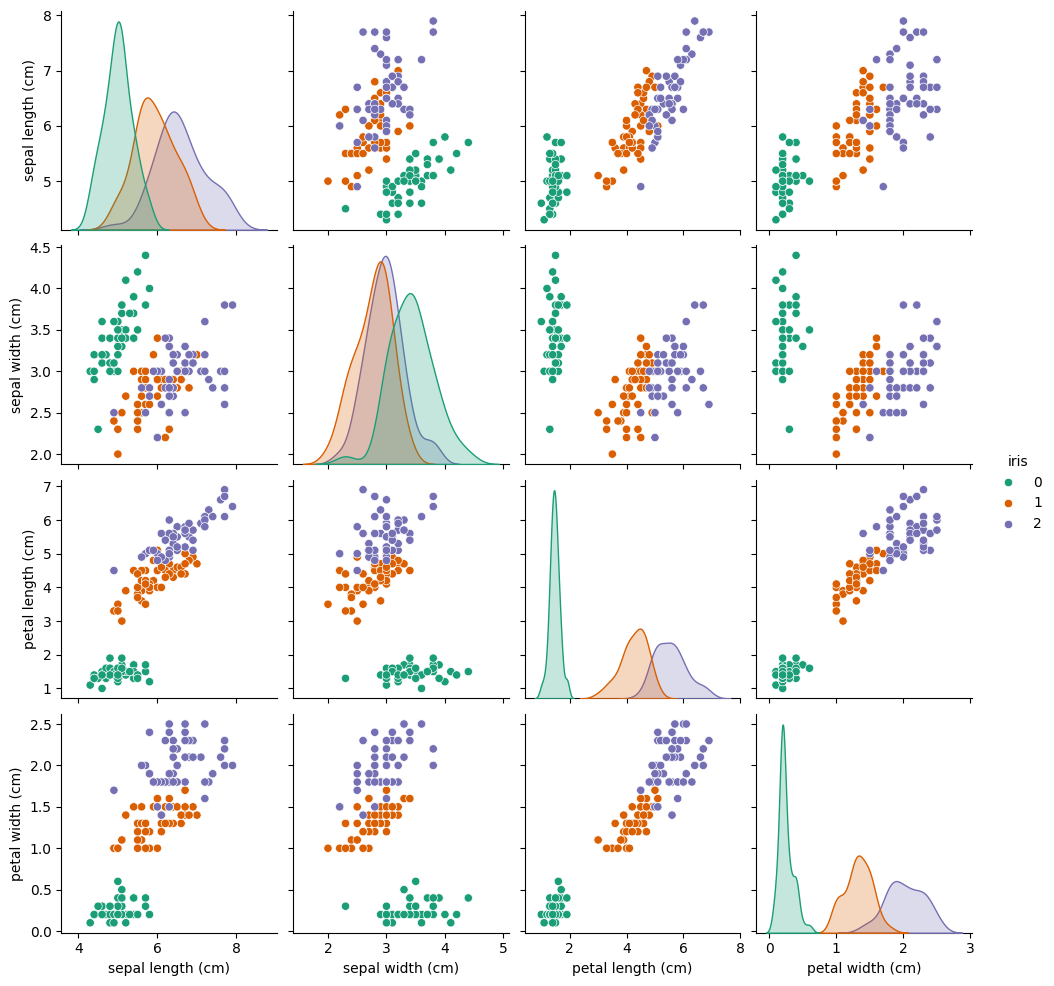

In [9]:
sns.pairplot(df_completo, hue='iris', palette='Dark2')

In [10]:
df_completo.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'iris'],
      dtype='object')

In [11]:
setosa = df_completo[df_completo['iris']==2]

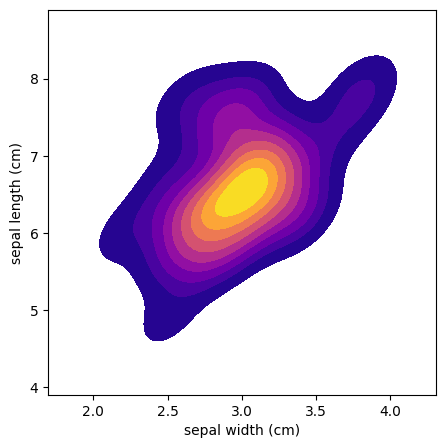

In [12]:
plt.figure(figsize=(5,5))
sns.kdeplot(y='sepal length (cm)', x='sepal width (cm)', data= setosa, cmap='plasma', fill=True);
plt.show()

In [13]:
X= df_completo.drop('iris', axis=1)
y= df_completo['iris']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.35)

In [15]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)
pred = model_svc.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  0  0]
 [ 0 14  0]
 [ 0  1 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        19

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [18]:
print(confusion_matrix(y, model_svc.predict(X)))
print(classification_report(y, model_svc.predict(X)))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



grid

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.001,0.0001],"kernel":['rbf']}

In [21]:
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

array([1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 1])

In [22]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
print(confusion_matrix(y_test, grid.predict(X_test)))
print(classification_report(y_test, grid.predict(X_test)))

[[20  0  0]
 [ 0 14  0]
 [ 0  1 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        19

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



In [24]:
print(confusion_matrix(y, grid.predict(X)))
print(classification_report(y, grid.predict(X)))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [25]:
from joblib import dump, load
dump(grid, 'iris_grid.joblib')

['iris_grid.joblib']